<a href="https://colab.research.google.com/github/jtndr26/Bike-Sharing-Demand-/blob/main/ML_Capstone_II_sqrt_capped.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bike Sharing Demand Prediction

## Business Context:
Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time.

## Problem Description:
Providing the city with the stable supply of rental bikes becomes a major concern. The crucial part is the prediction of the bike count required at each hour for the stable supply of the Rental bikes.

## Objective:
Make a prediction using Linear Regression technique on the count of the Rental bikes, so as to maintain the stable supply of bikes.

### 1. Reading and Understanding the data.

In [1]:
# Mounting Google drive to access dataset.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Import required Libraries.
import numpy as np, pandas as pd
from numpy import math
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns',None)

In [3]:
# Supressing warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Reading the dataset
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Machine Learning/Capstone_II/SeoulBikeData.csv',encoding = 'ISO-8859-1')
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [6]:
# Changing Date column from object to datetime format
from datetime import datetime
df['Date'] = df['Date'].apply(lambda x: datetime.strptime(x,'%d/%m/%Y'))
df.head(2)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [7]:
df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


**Rented Bike Count** is our Target/Dependent variable. Our task is to make predictions on this feature.

The dataset looks clean and doesn't have any missing values, the formats of the variables are also good.

### 2. Exploratory Data Analysis

In [8]:
# Clubbing numerical datatypes variables
num_cols = df.select_dtypes(include = ['int','float']).columns
num_cols

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)'],
      dtype='object')

In [9]:
# Clubbing categorical datatypes variables
cat_cols = df.select_dtypes(include = ['object']).columns
cat_cols

Index(['Seasons', 'Holiday', 'Functioning Day'], dtype='object')

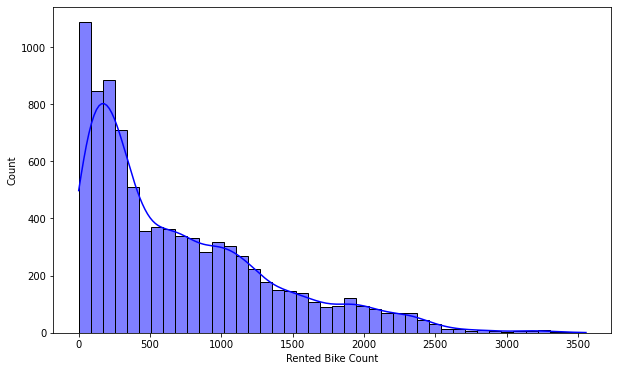

In [10]:
plt.figure(figsize = (10,6))
sns.histplot(df['Rented Bike Count'],kde = True,color = 'b')
plt.show()

The distribution of the target variable is highly skewed(Right Skewed). This generally look because of positive outliers. To deal with this skewness we've to perform log transformation on the target variable.  

In [11]:
df[(df['Rented Bike Count'] == 0) & (df['Functioning Day'] == 'No')].shape

(295, 14)

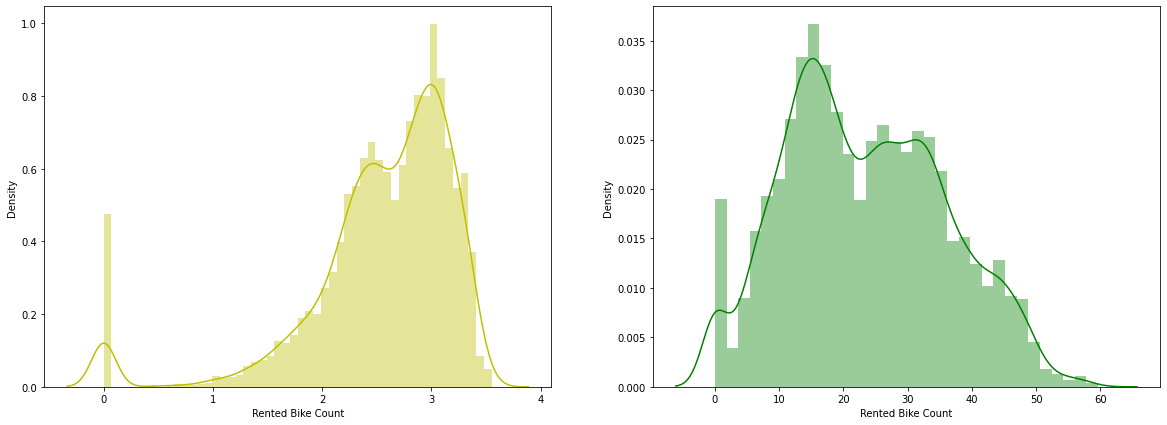

In [12]:
plt.figure(figsize = (20,7))
plt.subplot(1,2,1)
sns.distplot(np.log10(df['Rented Bike Count']+1),color = 'y')
plt.subplot(1,2,2)
sns.distplot(np.sqrt(df['Rented Bike Count']),color = 'g')
plt.show()

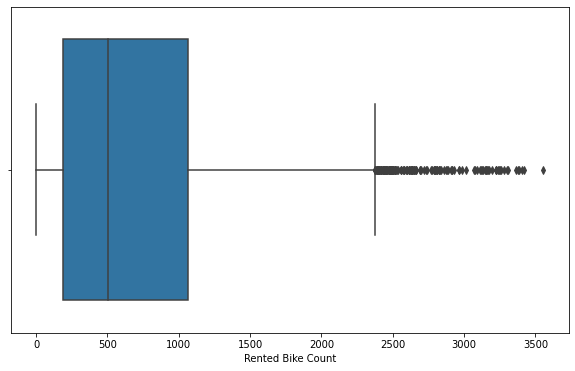

In [13]:
plt.figure(figsize = (10,6))
sns.boxplot(df['Rented Bike Count'])
plt.show()

In [14]:
df1 = df.copy()
percentile = df1['Rented Bike Count'].quantile([0.05,0.95]).values
df1['Rented Bike Count'] = np.clip(df1['Rented Bike Count'],percentile[0],percentile[1])

In [15]:
percentile[0],percentile[1]

(22.0, 2043.0)

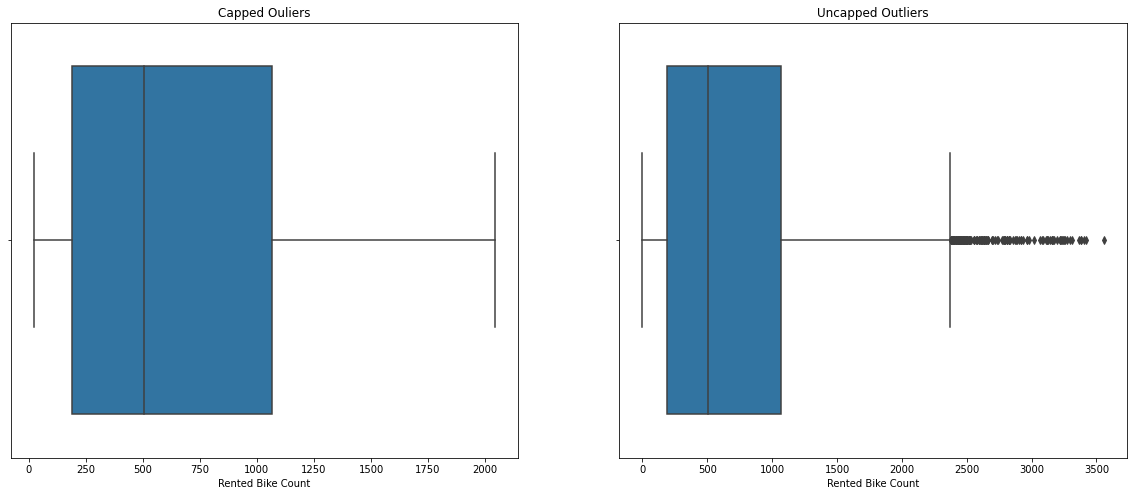

In [16]:
plt.figure(figsize = (20,8))
plt.subplot(1,2,1)
sns.boxplot(df1['Rented Bike Count'])
plt.title('Capped Ouliers')
plt.subplot(1,2,2)
sns.boxplot(df['Rented Bike Count'])
plt.title('Uncapped Outliers')
plt.show()

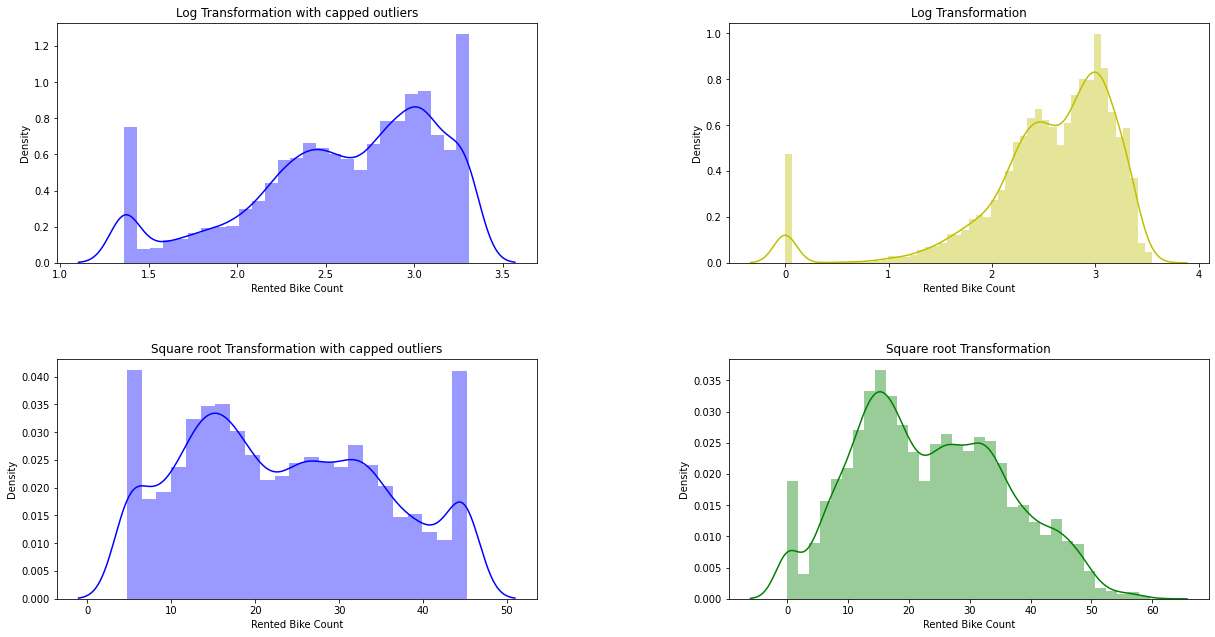

In [17]:
plt.figure(figsize = (20,10))
plt.subplot(2,2,1)
sns.distplot(np.log10(df1['Rented Bike Count']+1),color = 'b')
plt.title('Log Transformation with capped outliers')
plt.subplot(2,2,2)
sns.distplot(np.log10(df['Rented Bike Count']+1),color = 'y')
plt.title('Log Transformation')
plt.subplot(2,2,3)
sns.distplot(np.sqrt(df1['Rented Bike Count']),color = 'b')
plt.title('Square root Transformation with capped outliers')
plt.subplot(2,2,4)
sns.distplot(np.sqrt(df['Rented Bike Count']),color = 'g')
plt.title('Square root Transformation')
plt.subplots_adjust(left=0.1,bottom=0.1,right=0.9,top=0.9,wspace=0.4,hspace=0.4)
plt.show()

Since the Target variable contains counts as 0 also, the log transformation shows a spike at 0 count and a couple at the middle. So we also looked for a Square root transformation, although the spikes in the square root transformation are somewhere popping but they are almost near the centre region.

## Univariate Analysis

In [18]:
num_cols

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)'],
      dtype='object')

In [19]:
len(num_cols)

10

In [20]:
df = df1.copy()

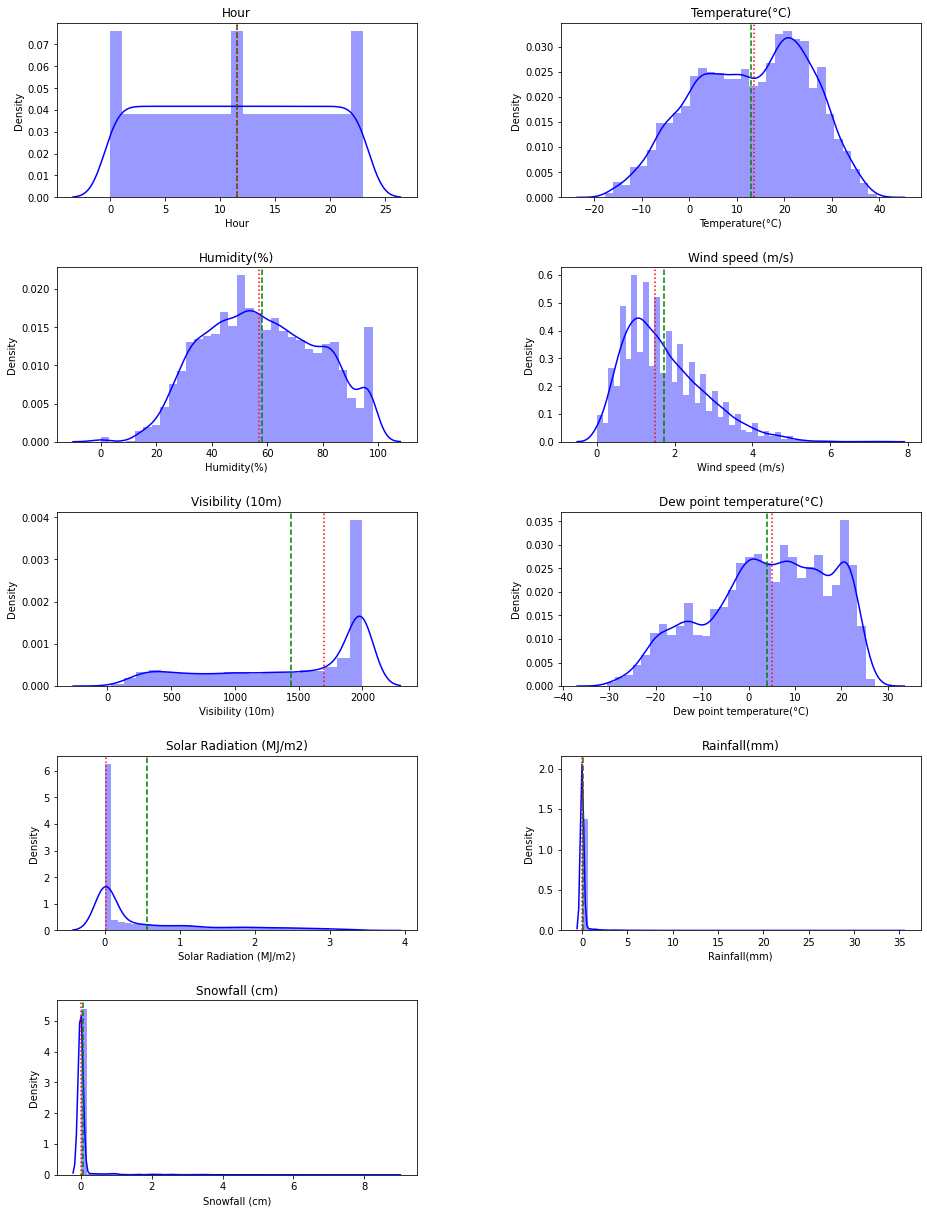

In [21]:
plt.figure(figsize = (15,20))
for i in range(1,len(num_cols)):
  plt.subplot(5,2,i)
  sns.distplot(df[num_cols[i]],color = 'b')
  plt.axvline(df[num_cols[i]].mean(),color = 'g',linestyle = 'dashed')
  plt.axvline(df[num_cols[i]].median(),color = 'r',linestyle = 'dotted')
  plt.title(num_cols[i])
  plt.subplots_adjust(left=0.1,bottom=0.1,right=0.9,top=0.9,wspace=0.4,hspace=0.4)
plt.show()


Numeric data shows mix behavior, while some numeric feature are uniformly distributed, rest shows high skewness.

In [22]:
cat_cols

Index(['Seasons', 'Holiday', 'Functioning Day'], dtype='object')

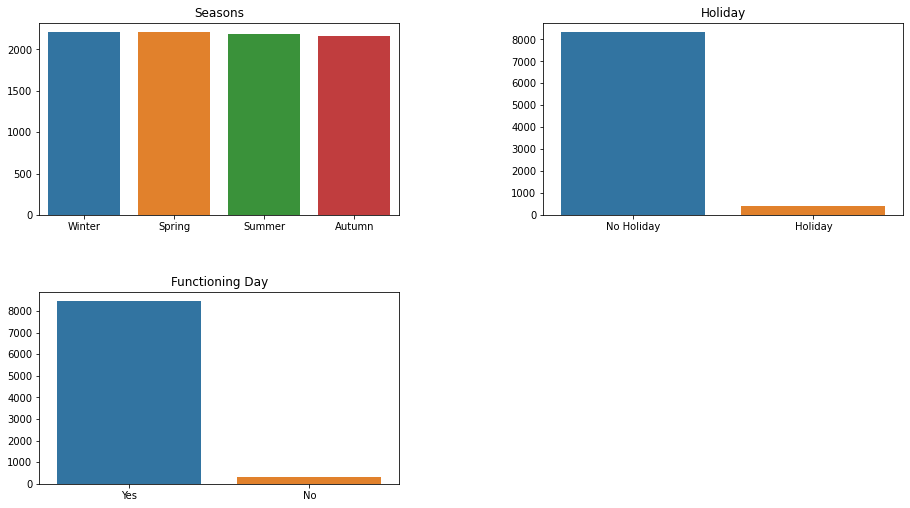

In [23]:
plt.figure(figsize = (15,8))
for i in range(0,len(cat_cols)):
  plt.subplot(2,2,i+1)
  sns.barplot(df[cat_cols[i]].unique(),df[cat_cols[i]].value_counts().values)
  plt.title(cat_cols[i])
  plt.subplots_adjust(left=0.1,bottom=0.1,right=0.9,top=0.9,wspace=0.4,hspace=0.4)
plt.show()

In categorical data, Holiday and Functioning day shows high skewness while Seasons are evenly contributing to the data.

## Bi-Variate Analysis

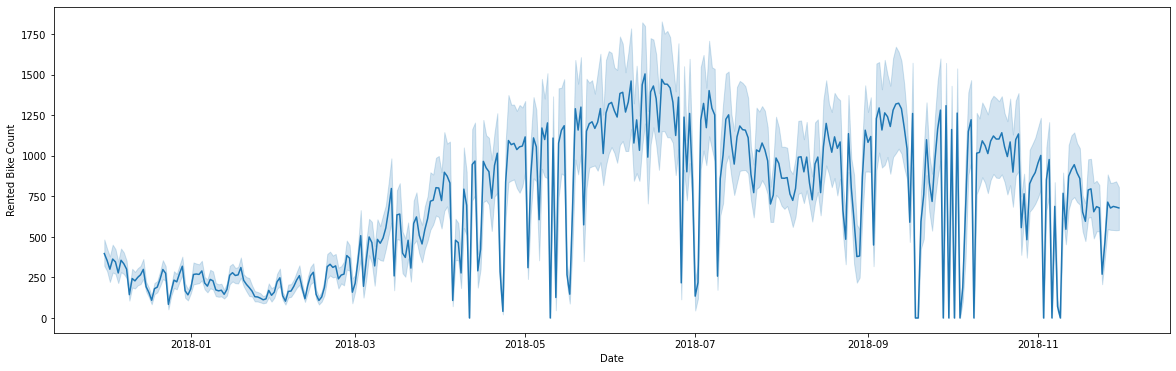

In [ ]:
plt.figure(figsize = (20,6))
sns.lineplot(df['Date'],df['Rented Bike Count'])
plt.show()

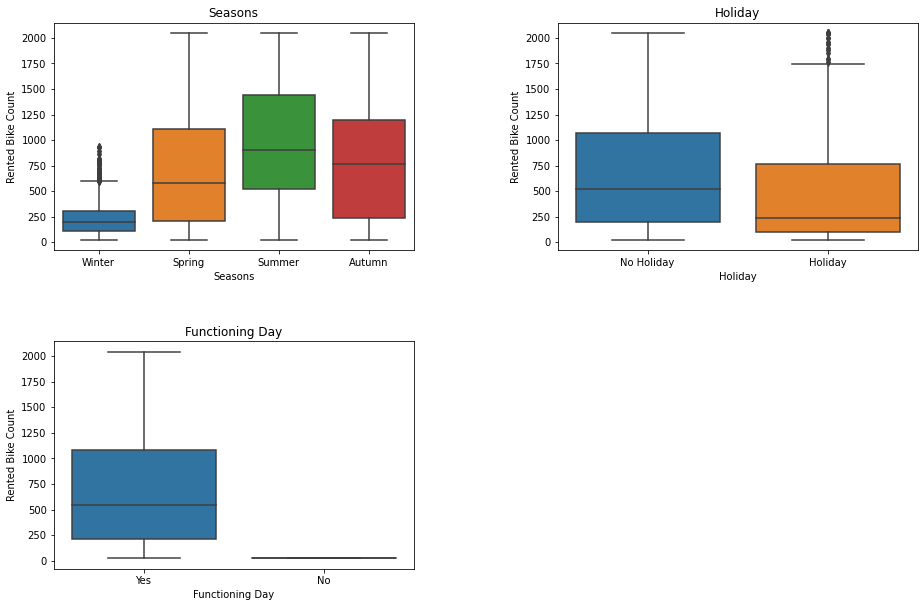

In [ ]:
plt.figure(figsize = (15,15))
for i in range(len(cat_cols)):
  plt.subplot(3,2,i+1)
  sns.boxplot(df[cat_cols[i]],df['Rented Bike Count'])
  plt.subplots_adjust(left=0.1,bottom=0.1,right=0.9,top=0.9,wspace=0.4,hspace=0.4)
  plt.title(cat_cols[i])
plt.show()

When considering categorical variables alongwith Target variable, 
- Seasons except 'winter' are hugely contributing to the count of the Rented bike. We may say in winters there are issues related to coldwave, visibility.
- Whether it is a Holiday or not the renting of bikes is not much affected, although the average count is high when there is no holiday.
- If the day is Functioning the count is impacted heavily as the people are more likely to rent the bikes on such days

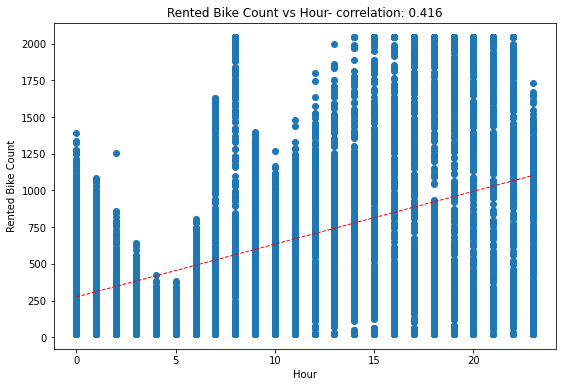

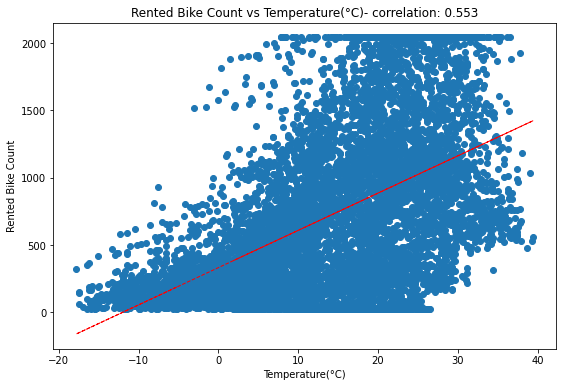

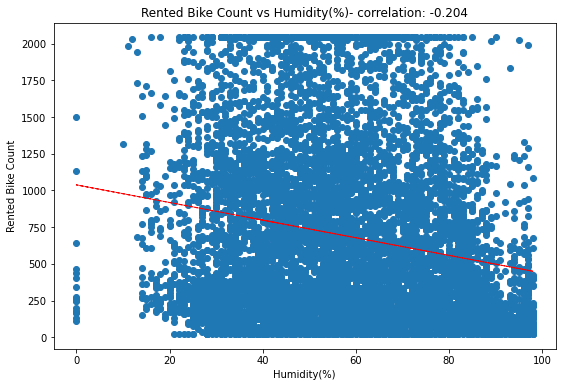

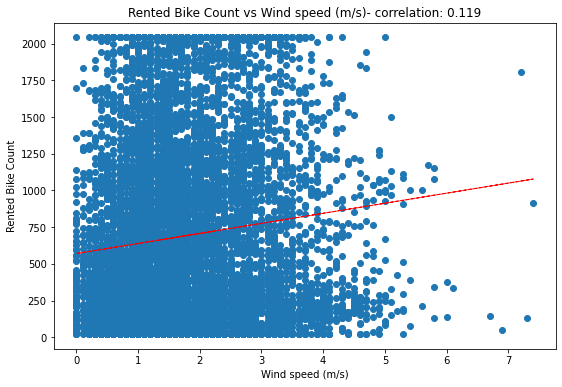

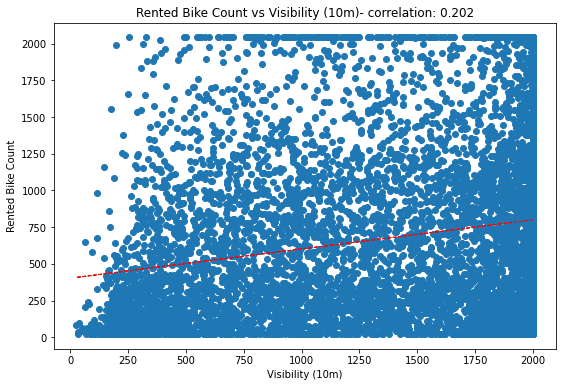

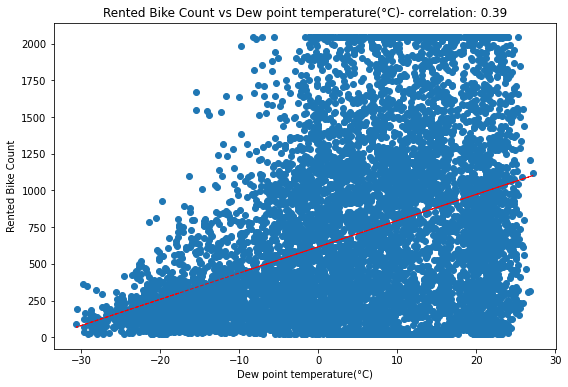

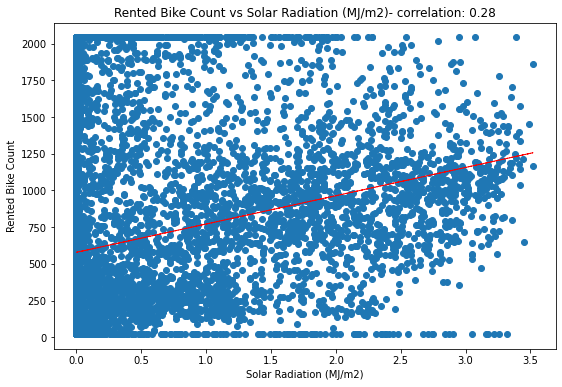

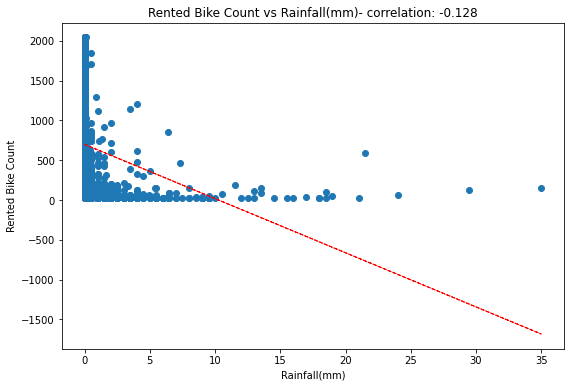

In [ ]:
for col in num_cols[1:-1]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    label = df['Rented Bike Count']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Rented Bike Count')
    ax.set_title('Rented Bike Count vs ' + col + '- correlation: ' + str(round(correlation,3)))
    z = np.polyfit(df[col], df['Rented Bike Count'], 1)
    y_hat = np.poly1d(z)(df[col])

    plt.plot(df[col], y_hat, "r--", lw=1)

plt.show()

Except for Humidity and Rainfall rest all other numeric variables shows positive relation with the Target variable. 

In [ ]:
df.groupby('Hour')['Rented Bike Count'].mean().sort_values(ascending = False)[:5]

Hour
18    1287.498630
19    1122.986301
17    1114.632877
20    1034.898630
21    1013.438356
Name: Rented Bike Count, dtype: float64

- **On an Average the renting of bikes is higher during the evening to night commute.**


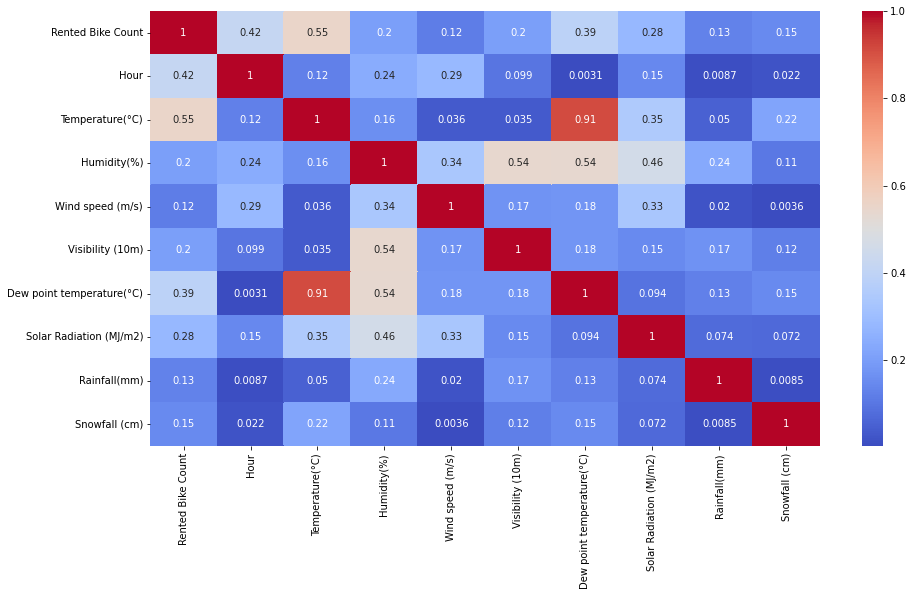

In [ ]:
plt.figure(figsize = (15,8))
correlation = df.corr()
sns.heatmap(abs(correlation),annot = True,cmap = 'coolwarm')
plt.show()

From above correlation visual, we may drop either Temperature or Dew point temperature variable as they have high correlation with each other and may predict same for the Target Variable. 
- **Now question which one to retain**

## Linear Regression

In order to check their collinearity we calculate **Variance Inflation Factor-VIF** for our model

In [24]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):
  vif = pd.DataFrame()
  vif['variables'] = X.columns
  vif['VIF'] = [variance_inflation_factor(X.values,i) for i in  range(X.shape[1])]
  vif.sort_values(by = 'VIF',ascending = False,inplace = True)
  return(vif)

In [25]:
num_cols

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)'],
      dtype='object')

In [26]:
calc_vif(df[[i for i in num_cols if i not in ['Rented Bike Count','Temperature(°C)','Humidity(%)']]])

,variables,VIF
1,Wind speed (m/s),4.294676
2,Visibility (10m),3.858300
0,Hour,3.692068
4,Solar Radiation (MJ/m2),1.681888
3,Dew point temperature(°C),1.147759
5,Rainfall(mm),1.049933
6,Snowfall (cm),1.043130


On the basis if the collinearity the VIF function has shortlisted some variables which are not collinear and in that process the Temperature variable is not been selected by the function.

In [ ]:
cat_cols

Index(['Seasons', 'Holiday', 'Functioning Day'], dtype='object')

In [ ]:
for i in cat_cols:
  print(df[i].value_counts())
  print('\n')

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64


No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64


Yes    8465
No      295
Name: Functioning Day, dtype: int64




In order to begin with the regression part let's start by creating dummy variables,to further simplify the categorical variables.

In [27]:
# labels = {'Seasons':{'Spring':0,'Summer':1,'Autumn':3,'Winter':4},'Holiday':{'No Holiday':0,'Holiday':1},'Functioning Day':{'Yes':1,'No':0}}
df_pr = df.copy() # Data preparation
df_pr = df_pr.replace({'Holiday':{'No Holiday':0,'Holiday':1}})
df_pr.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,2017-12-01,254.0,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,0,Yes
1,2017-12-01,204.0,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,0,Yes
2,2017-12-01,173.0,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,0,Yes
3,2017-12-01,107.0,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,0,Yes
4,2017-12-01,78.0,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,0,Yes


In [28]:
# One hot encoding
df_pr = pd.get_dummies(df_pr,columns = ['Functioning Day'],prefix = ['func_day'])
Season = pd.get_dummies(df_pr['Seasons'])
# Holiday = pd.get_dummies(df_pr['Holiday'])

df_pr = pd.concat([df_pr,Season],axis = 1)
# df_pr = pd.concat([df_pr,Holiday],axis = 1)

df_pr.drop(['Seasons'],axis = 1,inplace = True)
df_pr.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,func_day_No,func_day_Yes,Autumn,Spring,Summer,Winter
0,2017-12-01,254.0,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,0,1,0,0,0,1
1,2017-12-01,204.0,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,0,1,0,0,0,1
2,2017-12-01,173.0,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,0,1,0,0,0,1
3,2017-12-01,107.0,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,0,1,0,0,0,1
4,2017-12-01,78.0,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,0,1,0,0,0,1


In [ ]:
df_pr.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Holiday',
       'func_day_No', 'func_day_Yes', 'Autumn', 'Spring', 'Summer', 'Winter'],
      dtype='object')

In [29]:
feature = [i for i in df_pr.columns if i not in ['Date','Rented Bike Count','Temperature(°C)','Humidity(%)']]
feature

['Hour',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Dew point temperature(°C)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)',
 'Holiday',
 'func_day_No',
 'func_day_Yes',
 'Autumn',
 'Spring',
 'Summer',
 'Winter']

**Only the variables which are not collinear are goning to be used from hear on also the DateTime variable is excluded as we're not performing Time Series analysis.**

### **1. Multiple Linear Regression**

In [30]:
# Imprting required libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [31]:
from scipy.stats import zscore
X = df_pr[feature].apply(zscore) #These scores are a useful way of putting data from different sources onto the same scale.
y = np.sqrt(df_pr['Rented Bike Count']) # Performing square root transformation on the Target variable.

**Performing Train Test Split**

In [32]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 0)
print(X_train.shape)
print(X_test.shape)

(6132, 14)
(2628, 14)


In [33]:
reg = LinearRegression().fit(X_train,y_train)
reg.score(X_train,y_train)

0.5925103135286304

In [ ]:
reg.coef_

array([ 4.18205555e+00,  9.15627527e-02,  1.88139970e+00,  2.21132975e+00,
        1.80031994e+00, -2.05427198e+00, -4.76003587e-01, -5.14645135e-01,
        2.26940343e+14,  2.26940343e+14,  1.04413496e+14,  1.04793875e+14,
        1.04793875e+14,  1.04027524e+14])

In [ ]:
reg.intercept_

23.538231062722332

In [34]:
coef1 = []
coef1.append(reg.intercept_)
for i in reg.coef_:
  coef1.append(i)

In [35]:
y_pred = reg.predict(X_test)
y_pred

array([21.53823106, 25.16323106, 17.67885606, ..., 20.05385606,
       13.10073106, 25.71791856])

In [36]:
MSE = mean_squared_error(y_test**2,y_pred**2)
print('MSE:',MSE)
print('RMSE:',np.sqrt(MSE))

MSE: 160100.9705179174
RMSE: 400.126193241479


In [37]:
r2 = r2_score((y_test**2), (y_pred**2))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test**2),(y_pred**2)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

R2 : 0.545205822327218
Adjusted R2 :  0.5427691141422126


In [38]:
metric1 = []
metric1.append(MSE)
metric1.append(MSE**0.5)
metric1.append(r2)
metric1.append(1-(1-r2_score((y_test**2),(y_pred**2)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))


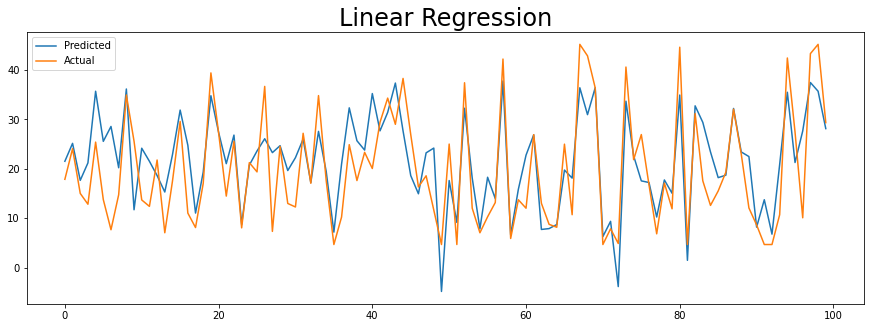

In [40]:
plt.figure(figsize=(15,5))
plt.plot((y_pred[:100]))
plt.plot(np.array(y_test[:100]))
plt.legend(["Predicted","Actual"])
plt.title('Linear Regression',fontsize = 24)
plt.show()

After using a simple model for Linear Regression:
- the test and predicted results are not similar.
- the has not learned the exact behavor of the feaure variables.

We can improve the performance by using other linear regression techniques.

### **2. Lasso Regression**

In [41]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha = 0.1,max_iter = 3000)
lasso.fit(X_train,y_train)

Lasso(alpha=0.1, max_iter=3000)

In [ ]:
lasso.score(X_train,y_train)

0.5920279395801014

In [ ]:
y_pred_l = lasso.predict(X_test)

In [ ]:
MSE = mean_squared_error(y_test**2,y_pred_l**2)
print('MSE:',MSE)
print('RMSE:',np.sqrt(MSE))

r2 = r2_score((y_test**2), (y_pred_l**2))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test**2), (y_pred_l**2)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE: 162047.1446236977
RMSE: 402.5507975693226
R2 : 0.5396773820611588
Adjusted R2 :  0.5372110534537559


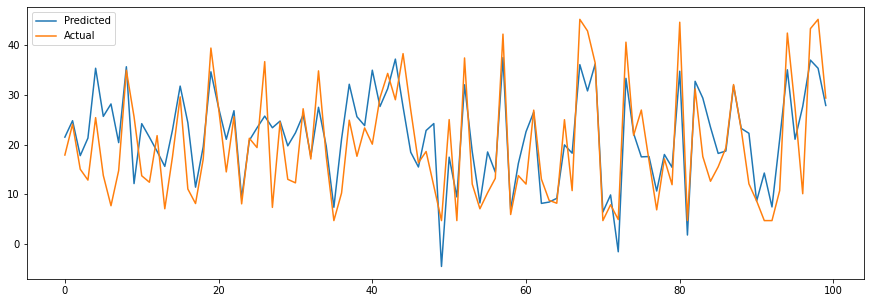

In [ ]:
plt.figure(figsize=(15,5))
plt.plot((y_pred_l[:100]))
plt.plot((np.array(y_test[:100])))
plt.legend(["Predicted","Actual"])
plt.show()

- The performance of the Lasso regression is quite on the lower side than that of Linear Regression.
- If we manage to fird the appropriate parameters to fine tune the method, we may achieve a better result.

### **3.Hyper-Parameter Tunning using GridserchCV**

In [42]:
from sklearn.model_selection import GridSearchCV

In [43]:
lasso = Lasso()
parameter = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0011]}
lasso_regressor = GridSearchCV(lasso,parameter,scoring = 'neg_mean_squared_error',cv = 5)
lasso_regressor.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100, 0.0011]},
             scoring='neg_mean_squared_error')

In [44]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.01}

Using  {'alpha': 0.01}  the negative mean squared error is:  -57.15734446450008


In [45]:
lassocv = Lasso(alpha = 0.01)
lassocv.fit(X_train,y_train)
lassocv.score(X_train,y_train)

0.5926945075841437

In [46]:
y_pred_lasso = lassocv.predict(X_test)

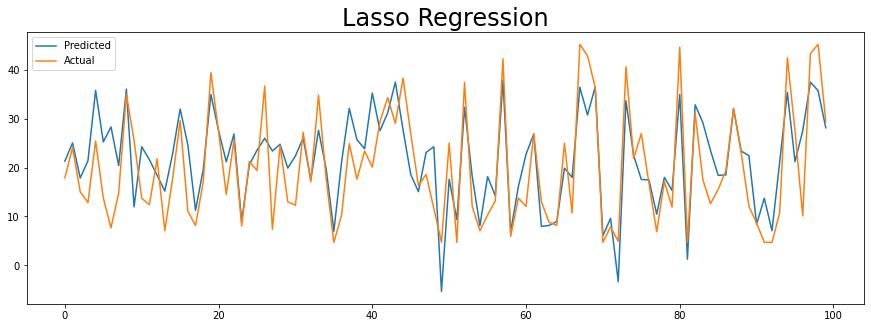

In [47]:
plt.figure(figsize=(15,5))
plt.plot((y_pred_lasso[:100]))
plt.plot((np.array(y_test[:100])))
plt.legend(["Predicted","Actual"])
plt.title('Lasso Regression',fontsize = 24)
plt.show()

In [48]:
MSE = mean_squared_error(y_test**2,y_pred_lasso**2)
print('MSE:',MSE)
print('RMSE:',np.sqrt(MSE))

r2 = r2_score((y_test**2), (y_pred_lasso**2))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test**2), (y_pred_lasso**2)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE: 160752.16673037334
RMSE: 400.9391060128375
R2 : 0.5433559881570099
Adjusted R2 :  0.5409093688819231


In [ ]:
lassocv.coef_

array([ 4.17825674e+00,  7.11058810e-02,  1.84575720e+00,  2.18944942e+00,
        1.83527489e+00, -2.01826295e+00, -4.64163428e-01, -5.38690705e-01,
       -4.19342088e+00,  2.03408807e-13,  1.04831543e+00, -3.95129402e-04,
        6.68038011e-01, -3.23375076e+00])

In [ ]:
lassocv.intercept_

23.521970677751977

In [49]:
coef2 = []
coef2.append(lassocv.intercept_)
for i in lassocv.coef_:
  coef2.append(i)

- After fine tunning the parameters for Lasso regression, we have a better result.
- Although we'll check if we get a better result when using other techniques.

In [50]:
metric2 = []
metric2.append(MSE)
metric2.append(MSE**0.5)
metric2.append(r2)
metric2.append(1-(1-r2_score((y_test**2), (y_pred_lasso**2)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

### **4.Ridge Regression**

In [51]:
from sklearn.linear_model import Ridge
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100,25]}
ridge_regressor = GridSearchCV(ridge,parameter,scoring = 'neg_mean_squared_error',cv = 5)
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100, 0.0011]},
             scoring='neg_mean_squared_error')

In [52]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 55}

Using  {'alpha': 55}  the negative mean squared error is:  -57.151858125114096


In [ ]:
ridge_regressor.score(X_train,y_train)

-56.85375597099079

In [53]:
ridge = Ridge(alpha = 55)
ridge.fit(X_train,y_train)
ridge.score(X_train,y_train)

0.5926780437097952

In [54]:
y_pred_ridge = ridge.predict(X_test)

In [ ]:
ridge.intercept_

23.522044639927437

In [ ]:
ridge.coef_

array([ 4.1465927 ,  0.09208176,  1.83452965,  2.18146773,  1.83069264,
       -2.01041609, -0.47656278, -0.54653566, -2.09106477,  2.09106477,
        1.42243139,  0.36233966,  1.05069111, -2.85114931])

In [55]:
coef3 = []
coef3.append(ridge.intercept_)
for i in ridge.coef_:
  coef3.append(i)

In [56]:
MSE  = mean_squared_error((y_test**2), (y_pred_ridge**2))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test**2), (y_pred_ridge**2))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test**2), (y_pred_ridge**2)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 161010.18304765897
RMSE : 401.2607419716748
R2 : 0.5426230486972023
Adjusted R2 :  0.5401725024598356


In [57]:
metric3 = []
metric3.append(MSE)
metric3.append(MSE**0.5)
metric3.append(r2)
metric3.append(1-(1-r2_score((y_test**2), (y_pred_ridge**2)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

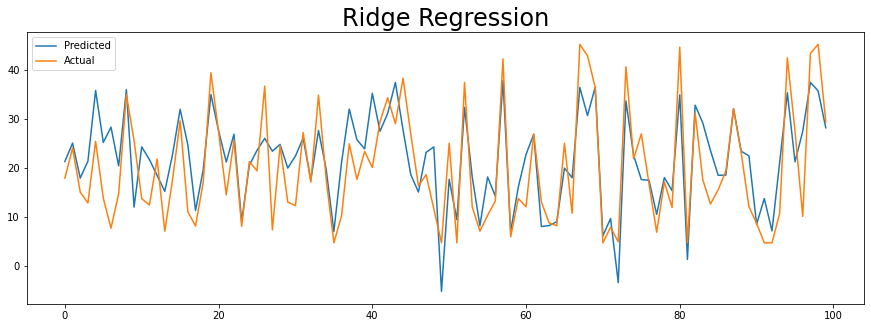

In [58]:
plt.figure(figsize=(15,5))
plt.plot((y_pred_ridge[:100]))
plt.plot((np.array(y_test[:100])))
plt.legend(["Predicted","Actual"])
plt.title('Ridge Regression',fontsize = 24)
plt.show()

- The result from the Ridge Regression are quite similar to the Linear Regression we performed earlier.

Now we combine both Lasso and Ridge in order to get a better result.

### **5.ElasticNet Regression**|

In [59]:
from sklearn.linear_model import ElasticNet
elastic = ElasticNet()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.011],'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8]}
elastic_regressor = GridSearchCV(elastic, parameters, scoring='neg_mean_squared_error',cv=5)
elastic_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100, 0.011],
                         'l1_ratio': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]},
             scoring='neg_mean_squared_error')

In [60]:
print("The best fit alpha value is found out to be :" ,elastic_regressor.best_params_)
print("\nUsing ",elastic_regressor.best_params_, " the negative mean squared error is: ", elastic_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.011, 'l1_ratio': 0.3}

Using  {'alpha': 0.011, 'l1_ratio': 0.3}  the negative mean squared error is:  -57.152916161229484


In [61]:
elastic = ElasticNet(alpha = 0.011,l1_ratio = 0.3)
elastic.fit(X_train,y_train)
elastic.score(X_train,y_train)

0.5926783796407261

In [62]:
y_pred_elastic = elastic.predict(X_test)

In [ ]:
elastic.coef_

array([ 4.14983411,  0.08781062,  1.83396631,  2.1802552 ,  1.8311281 ,
       -2.00967499, -0.47389238, -0.54384126, -2.11628529,  2.0652928 ,
        1.22507859,  0.16408721,  0.85320056, -3.04752033])

In [ ]:
elastic.intercept_

23.52207210736744

In [63]:
coef4 = []
coef4.append(elastic.intercept_)
for i in elastic.coef_:
  coef4.append(i)

In [64]:
MSE  = mean_squared_error((y_test**2), (y_pred_elastic**2))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test**2), (y_pred_elastic**2))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test**2), (y_pred_elastic**2)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 161000.08237327743
RMSE : 401.2481556010911
R2 : 0.5426517413895977
Adjusted R2 :  0.5402013488826916


In [65]:
metric4 = []
metric4.append(MSE)
metric4.append(MSE**0.5)
metric4.append(r2)
metric4.append(1-(1-r2_score((y_test**2), (y_pred_elastic**2)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

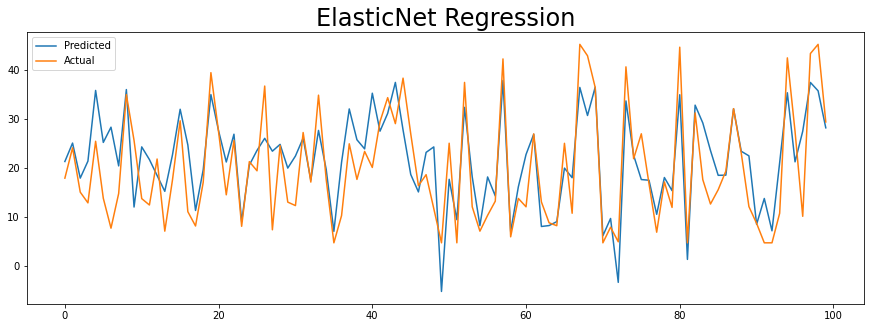

In [67]:
plt.figure(figsize=(15,5))
plt.plot((y_pred_elastic[:100]))
plt.plot((np.array(y_test[:100])))
plt.legend(["Predicted","Actual"])
plt.title('ElasticNet Regression', fontsize = 24)
plt.show()

- By combining both Lasso and Ridge we're getting apparently similar results. 

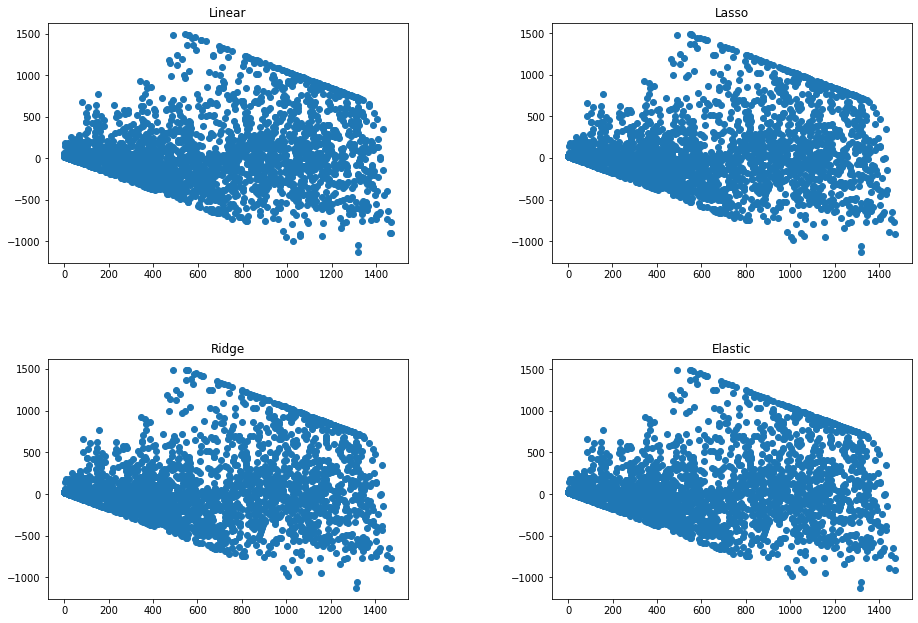

In [ ]:
### Heteroscadacity
plt.figure(figsize = (15,10))
plt.subplot(2,2,1)
plt.scatter((y_pred**2),((y_test**2)-(y_pred**2)))
plt.title('Linear')
plt.subplot(2,2,2)
plt.scatter((y_pred_lasso**2),((y_test**2)-(y_pred_lasso**2)))
plt.title('Lasso')
plt.subplot(2,2,3)
plt.scatter((y_pred_ridge**2),((y_test**2)-(y_pred_ridge**2)))
plt.title('Ridge')
plt.subplot(2,2,4)
plt.scatter((y_pred_elastic**2),((y_test**2)-(y_pred_elastic**2)))
plt.title('Elastic')
plt.subplots_adjust(left=0.1,bottom=0.1,right=0.9,top=0.9,wspace=0.4,hspace=0.4)
plt.show()

The heteroscedasticity for each model is almost similar

In [ ]:
lr_table = {'Metrics':['Mean Squared Error','Root Mean Squared Error','R2_score','Adjusted R2 score'],"Linear Regression":metric1}
lr_metric = pd.DataFrame(lr_table,columns = ['Metrics','Linear Regression'])
rg_metric = pd.Series(metric3,name = 'Ridge Regression')
ls_metric = pd.Series(metric2,name = 'Lasso Regression')
el_metric = pd.Series(metric4,name = 'ElasticNet Regression')
Final_Evaluation = pd.concat([lr_metric,ls_metric,rg_metric,el_metric],axis = 1)
Final_Evaluation

,Metrics,Linear Regression,Lasso Regression,Ridge Regression,ElasticNet Regression
0,Mean Squared Error,160100.970518,160752.166730,161010.183048,161000.082373
1,Root Mean Squared Error,400.126193,400.939106,401.260742,401.248156
2,R2_score,0.545206,0.543356,0.542623,0.542652
3,Adjusted R2 score,0.542769,0.540909,0.540173,0.540201


In [ ]:
coef = []
coef.append('Intercept')
for i in X_train.columns:
  coef.append(i)
coef

['Intercept',
 'Hour',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Dew point temperature(°C)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)',
 'Holiday',
 'func_day_No',
 'func_day_Yes',
 'Autumn',
 'Spring',
 'Summer',
 'Winter']

In [ ]:
cols = {'Coefficients':coef,'Linear Regression':coef1}
lr_coef = pd.DataFrame(cols,columns = ['Coefficients','Linear Regression'])
rg_coef= pd.Series(coef3,name = 'Ridge Regression')
ls_coef = pd.Series(coef2,name = 'Lasso Regression')
el_coef = pd.Series(coef4,name = 'ElasticNet Regression')
Coef_df = pd.concat([lr_coef,ls_coef,rg_coef,el_coef],axis = 1)
Coef_df

,Coefficients,Linear Regression,Lasso Regression,Ridge Regression,ElasticNet Regression
0,Intercept,2.353823e+01,2.352197e+01,23.522045,23.522072
1,Hour,4.182056e+00,4.178257e+00,4.146593,4.149834
2,Wind speed (m/s),9.156275e-02,7.110588e-02,0.092082,0.087811
3,Visibility (10m),1.881400e+00,1.845757e+00,1.834530,1.833966
4,Dew point temperature(°C),2.211330e+00,2.189449e+00,2.181468,2.180255
5,Solar Radiation (MJ/m2),1.800320e+00,1.835275e+00,1.830693,1.831128
6,Rainfall(mm),-2.054272e+00,-2.018263e+00,-2.010416,-2.009675
7,Snowfall (cm),-4.760036e-01,-4.641634e-01,-0.476563,-0.473892
8,Holiday,-5.146451e-01,-5.386907e-01,-0.546536,-0.543841
9,func_day_No,2.269403e+14,-4.193421e+00,-2.091065,-2.116285


- If we consider the results from Linear Regression model, we observe that the magnitude of the coefficients for almost half of the features are some where in the range of millions.
- This does not seems suitable, as it suggest that the result heavily rely on these selected few variables and we do not find the same behavior in other models.
- So even the score of Linear Regression model is quite good we are not considering it as our final model. 

- From the rest of three models the Lasso Regression shows some better scores.
- Lasso tends to do well if there are a small number of significant parameters and the others are close to zero. 
- Ridge works well if there are many large parameters of about the same value.

### Final Model
- Since te score of Lasso is better, we suggests to go with the Lasso Regression even though the number of variables are more than 10, we are more considerate of the scores from the model.

### **The equation best fitted for the line is:**
- **Rented Bike count = 23.521 + 4.17*Hour* + 0.0711*Wind Speed* + 1.845*Visibility* + 2.189*Dew Point Temperature* + 1.835*Solar Radiation* - 2.18*Rainfall* - 0.464*Snowfall* - 0.538*Holiday* - 4.19*func_day_No* + 2.03e^-13*func_day_Yes* + 1.04*Autumn* -3.95e^-4*Spring* + 0.686*Summer* - 3.233*Winter***

- To put in simple words Bike renting is strongly influenced by the Hour of the followed by the Dew point temperature, Visibility adn Solar radiation. 
- If it is not a Functioning day or if there is a Rainfall the Renting of bike decreases significantly. 
- Autumn is a favourable season for riding and renting a bike and the count dips down if it is a Winter day.
- Rest other feature contributes in a smaller portion in the Renting of the Bike.